# Generatives Trainig mit DeepHull und Max-Distanz loss, generatives und normales Netz trainieren unabhängig voneinander
falls noch kein ICNN Netz exisitiert, kann eins gelernt werden, indem man init auf True setzt

In [1]:
import numpy as np
import torch

from script.NeuralNets.Networks import ICNN
from script.NeuralNets.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for


In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 30
batch_size = 10

number_of_adversarial_samples = 1000
number_of_train_samples = 1000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

init = False

In [3]:
true_extremal_points = Rhombus().get_extremal_points()
if init:
    included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
    dataset = ConvexDataset(data=included_space)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    dataset = ConvexDataset(data= ambient_space)
    ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    random_samples = []
    for i in range(number_of_adversarial_samples): # generate random samples
        x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
        y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
        random_samples.append([[x, y]])

    value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
    adversarial_set = ConvexDataset(data=value)
    adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)

if init:
    torch.save(ambient_space, "../../ambient_space.pt")
    torch.save(included_space, "../../included_space.pt")
    torch.save(value, "../../value.pt")
else:
    icnn.load_state_dict(torch.load("../../icnn.pt"), strict=False)
    ambient_space = torch.load("../../ambient_space.pt").to(torch.float64)
    included_space = torch.load("../../included_space.pt").to(torch.float64)
    value = torch.load("../../value.pt").to(torch.float64)
    dataset = ConvexDataset(data=included_space)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    dataset = ConvexDataset(data=ambient_space)
    ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    adversarial_set = ConvexDataset(data=value)
    adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)

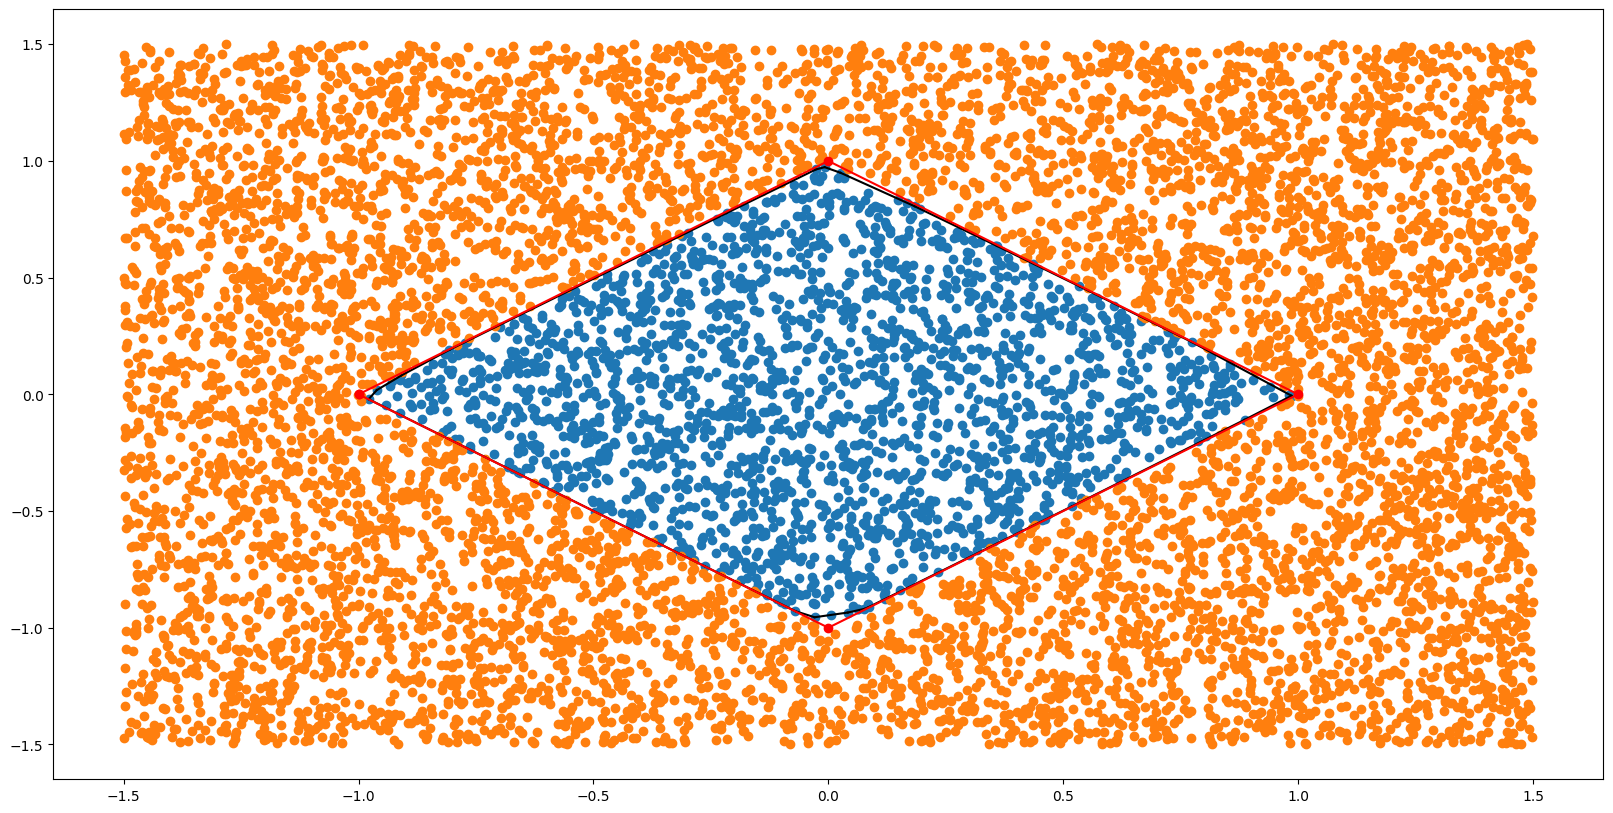

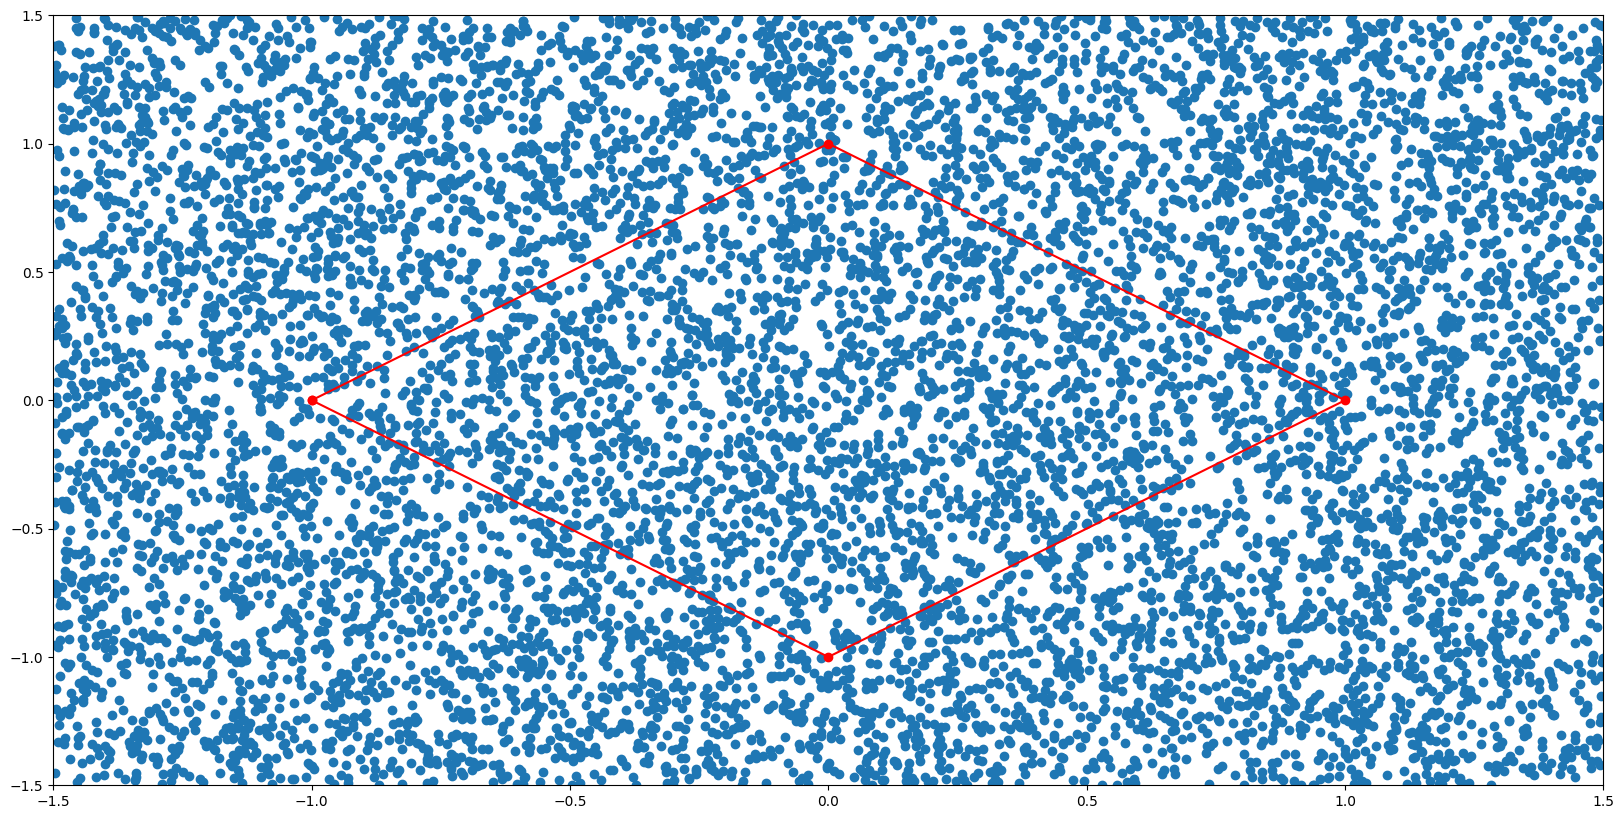

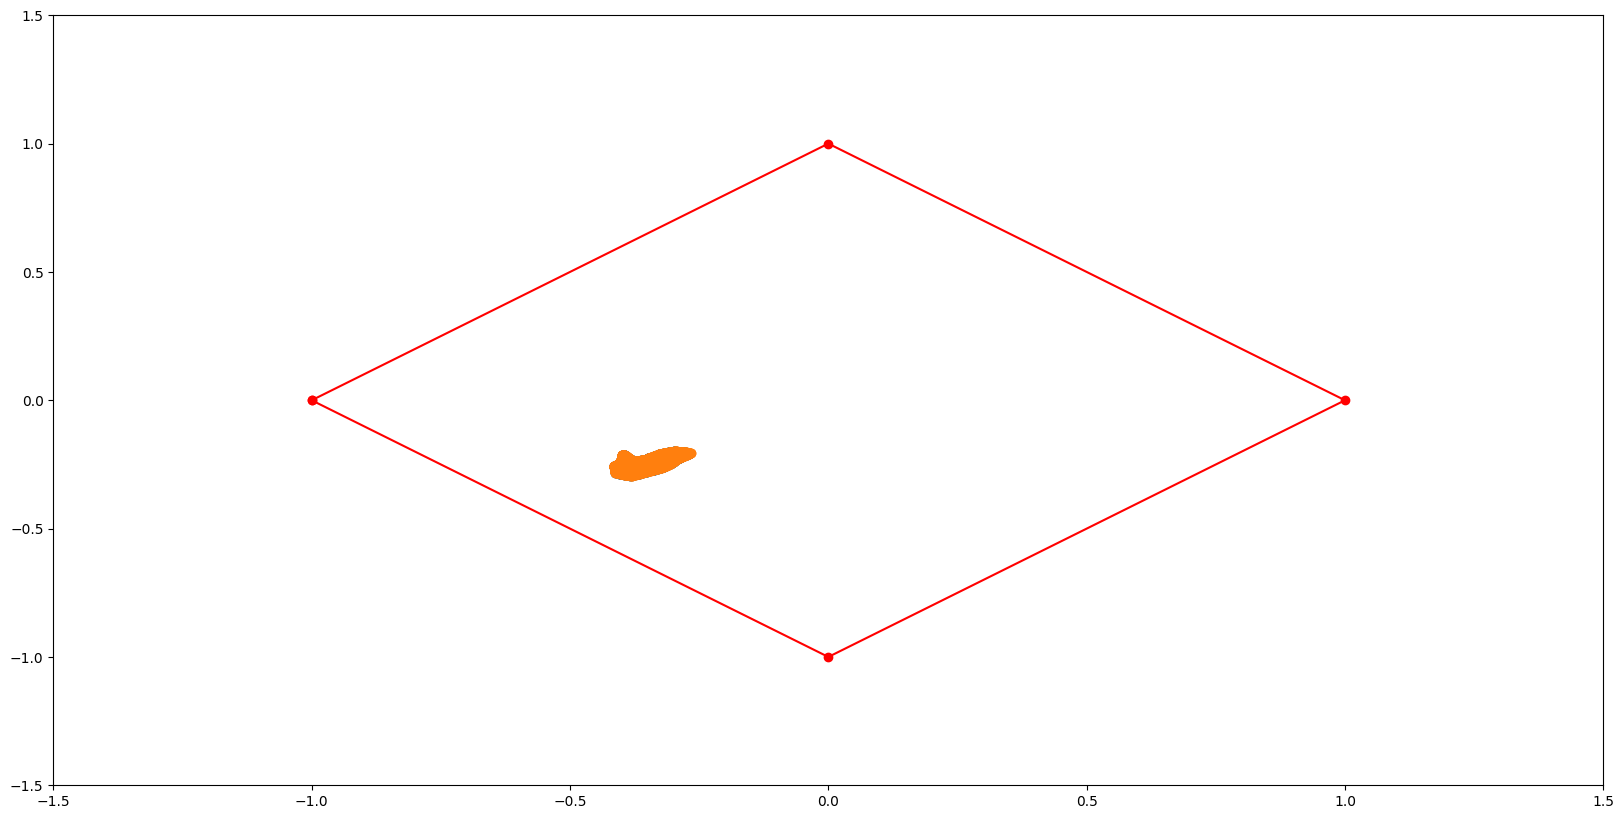

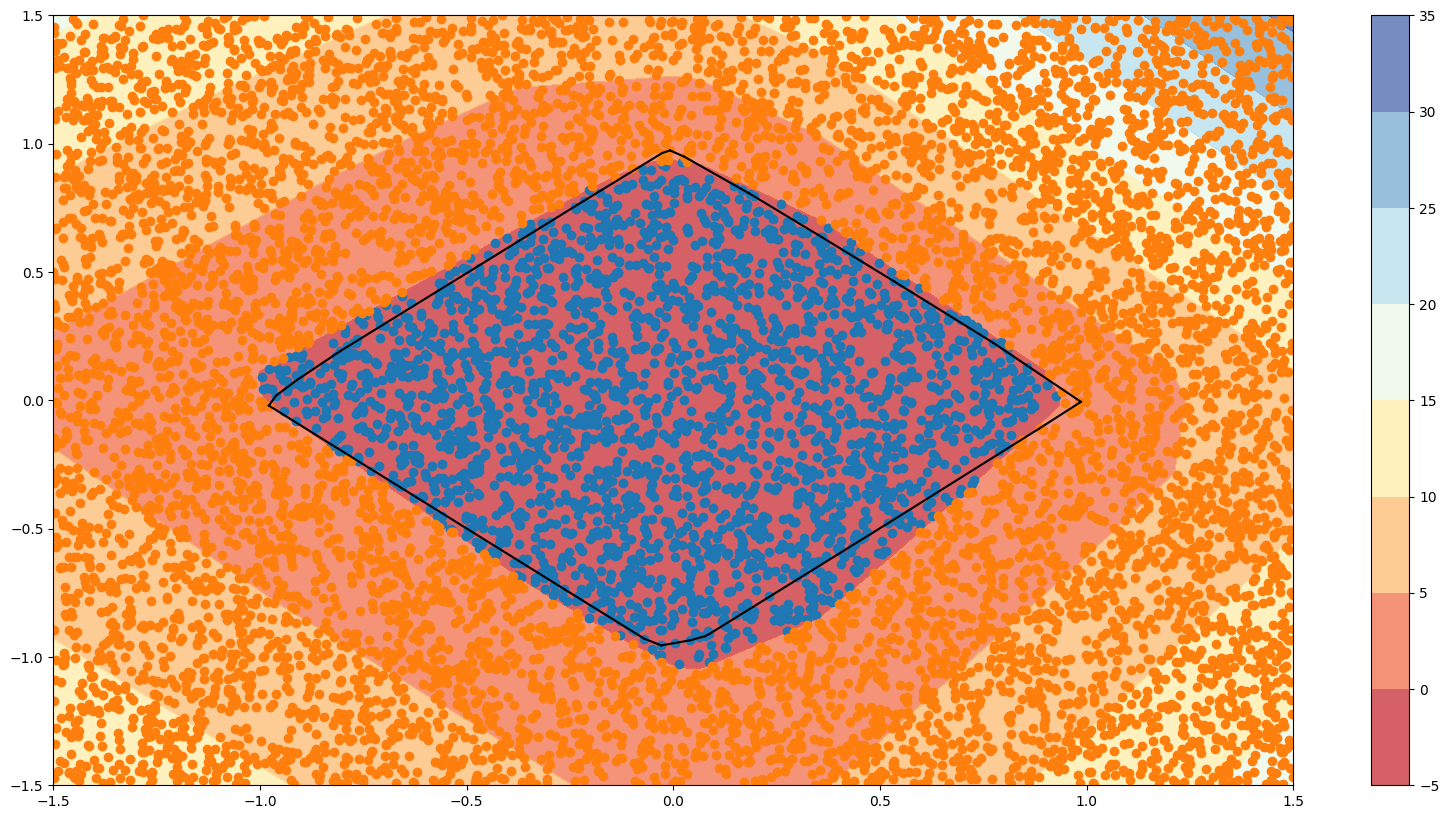

In [4]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()

if init:
    history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
    torch.save(icnn.state_dict(), "../../icnn.pt")
plots.plt_mesh()

=== Epoch: 0===
batch = 0, mean loss = 14.69859578824492, l_pos = 0.17516990677734245, l_neg = 0.0, l_gen = 14.523425881467578
batch = 100, mean loss = 13.628581596154447, l_pos = 0.1949127067895056, l_neg = 0.0, l_gen = 13.43366888936494
batch = 200, mean loss = 12.411432163697965, l_pos = 0.1959201870481044, l_neg = 0.0, l_gen = 12.215511976649855
batch = 221, mean loss = 12.155773827363928, l_pos = 0.19591142368213985, l_neg = 0.0, l_gen = 11.959862403681786
=== Epoch: 1===
batch = 0, mean loss = 8.855567411639418, l_pos = 0.19260683780677765, l_neg = 0.0, l_gen = 8.66296057383264
batch = 100, mean loss = 8.975321454703996, l_pos = 0.19505659785967264, l_neg = 0.0, l_gen = 8.780264856844326
batch = 200, mean loss = 8.830131578314338, l_pos = 0.19602263378422544, l_neg = 0.0, l_gen = 8.63410894453012
batch = 221, mean loss = 8.77196829193591, l_pos = 0.19591142368213962, l_neg = 0.0, l_gen = 8.576056868253772
=== Epoch: 2===
batch = 0, mean loss = 7.102812037104013, l_pos = 0.1983302

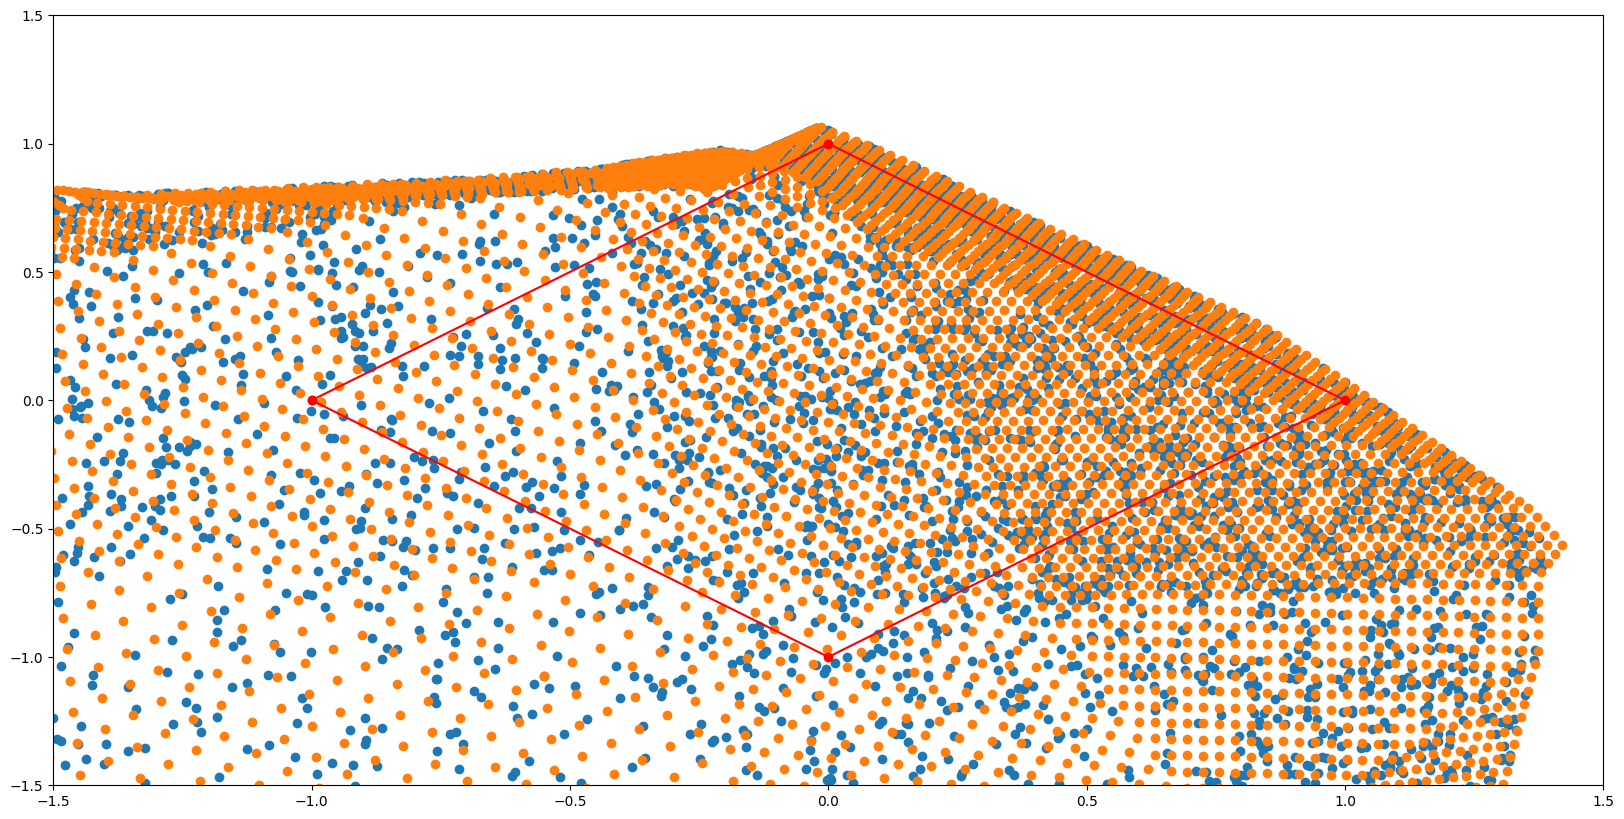

=== Epoch: 0===
batch = 0, mean loss = 8.211424229042153, l_pos = 0.2697722970368729, l_neg = 0.0, l_gen = 7.94165193200528
batch = 100, mean loss = 6.861022344761182, l_pos = 0.19752388509740632, l_neg = 0.0, l_gen = 6.663498459663776
batch = 200, mean loss = 6.861729465432161, l_pos = 0.19662951987227112, l_neg = 0.0, l_gen = 6.665099945559892
batch = 221, mean loss = 6.842133736584118, l_pos = 0.1959114236821399, l_neg = 0.0, l_gen = 6.646222312901982
=== Epoch: 1===
batch = 0, mean loss = 6.831210391284568, l_pos = 0.19199260684772845, l_neg = 0.0, l_gen = 6.639217784436839
batch = 100, mean loss = 6.905754196828136, l_pos = 0.1951998058915964, l_neg = 0.0, l_gen = 6.71055439093654
batch = 200, mean loss = 6.973299226812889, l_pos = 0.19664727485143202, l_neg = 0.0, l_gen = 6.776651951961455
batch = 221, mean loss = 6.961928763470281, l_pos = 0.19591142368213987, l_neg = 0.0, l_gen = 6.766017339788139
=== Epoch: 2===
batch = 0, mean loss = 7.402663499012213, l_pos = 0.1809031340403

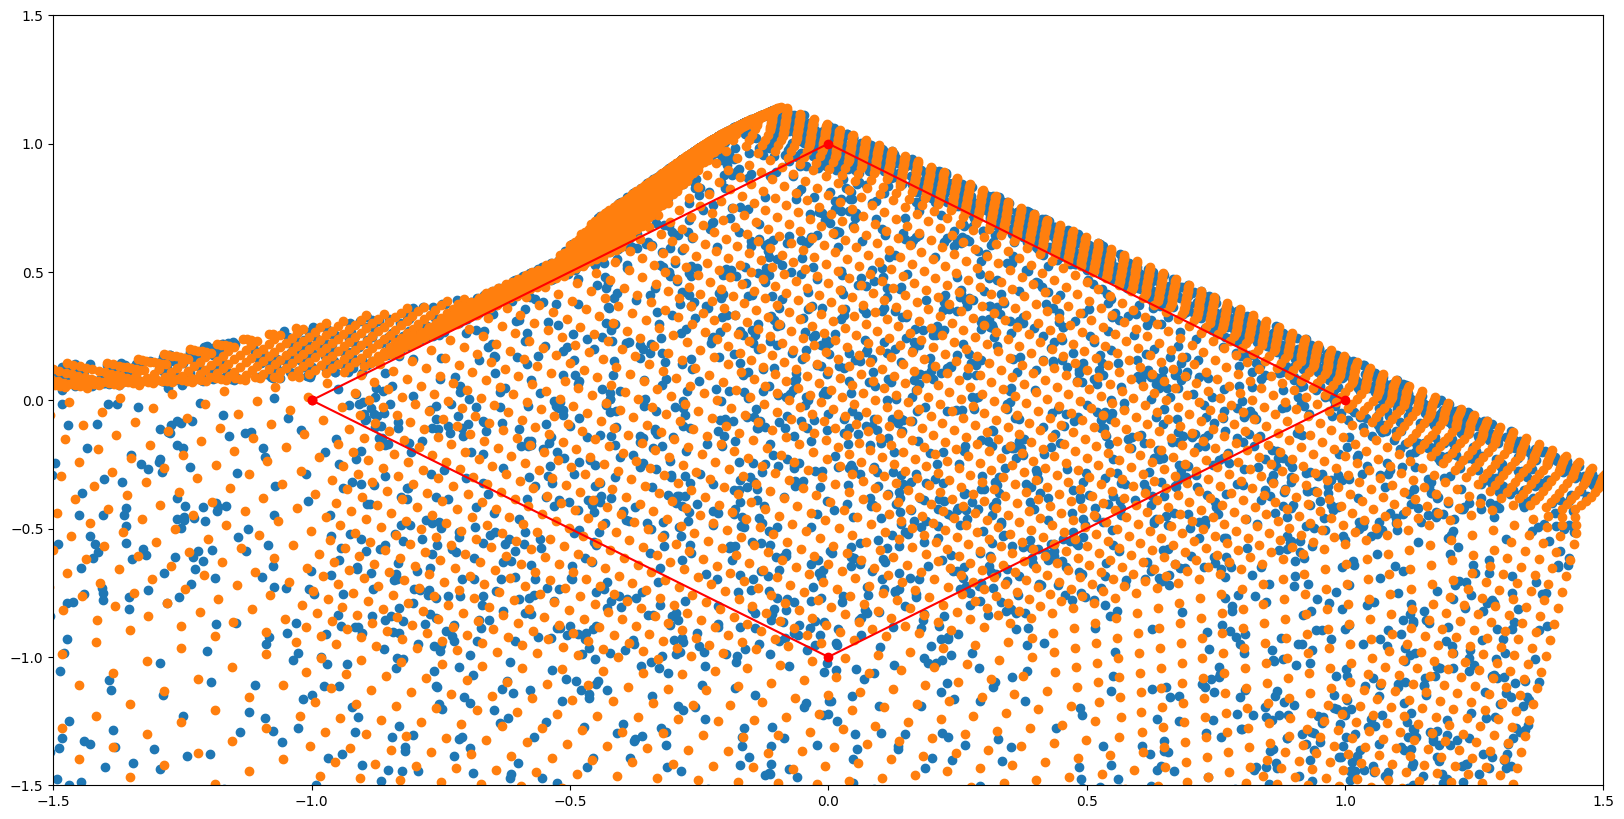

=== Epoch: 0===
batch = 0, mean loss = 6.4075795285783, l_pos = 0.185924472021637, l_neg = 0.0, l_gen = 6.2216550565566635
batch = 100, mean loss = 6.789838778197885, l_pos = 0.19401124267520575, l_neg = 0.0, l_gen = 6.5958275355226785
batch = 200, mean loss = 6.777578750847806, l_pos = 0.19408470985030862, l_neg = 0.0, l_gen = 6.583494040997491
batch = 221, mean loss = 6.77386282647266, l_pos = 0.19591142368213985, l_neg = 0.0, l_gen = 6.57795140279051
=== Epoch: 1===
batch = 0, mean loss = 6.910610417396874, l_pos = 0.27421766330560954, l_neg = 0.0, l_gen = 6.636392754091264
batch = 100, mean loss = 6.899187128531289, l_pos = 0.19307915234976208, l_neg = 0.0, l_gen = 6.706107976181527
batch = 200, mean loss = 6.92575808086281, l_pos = 0.1950410932760358, l_neg = 0.0, l_gen = 6.730716987586773
batch = 221, mean loss = 6.90850109255982, l_pos = 0.19591142368213982, l_neg = 0.0, l_gen = 6.712589668877679
=== Epoch: 2===
batch = 0, mean loss = 6.395200910260284, l_pos = 0.180072690854265

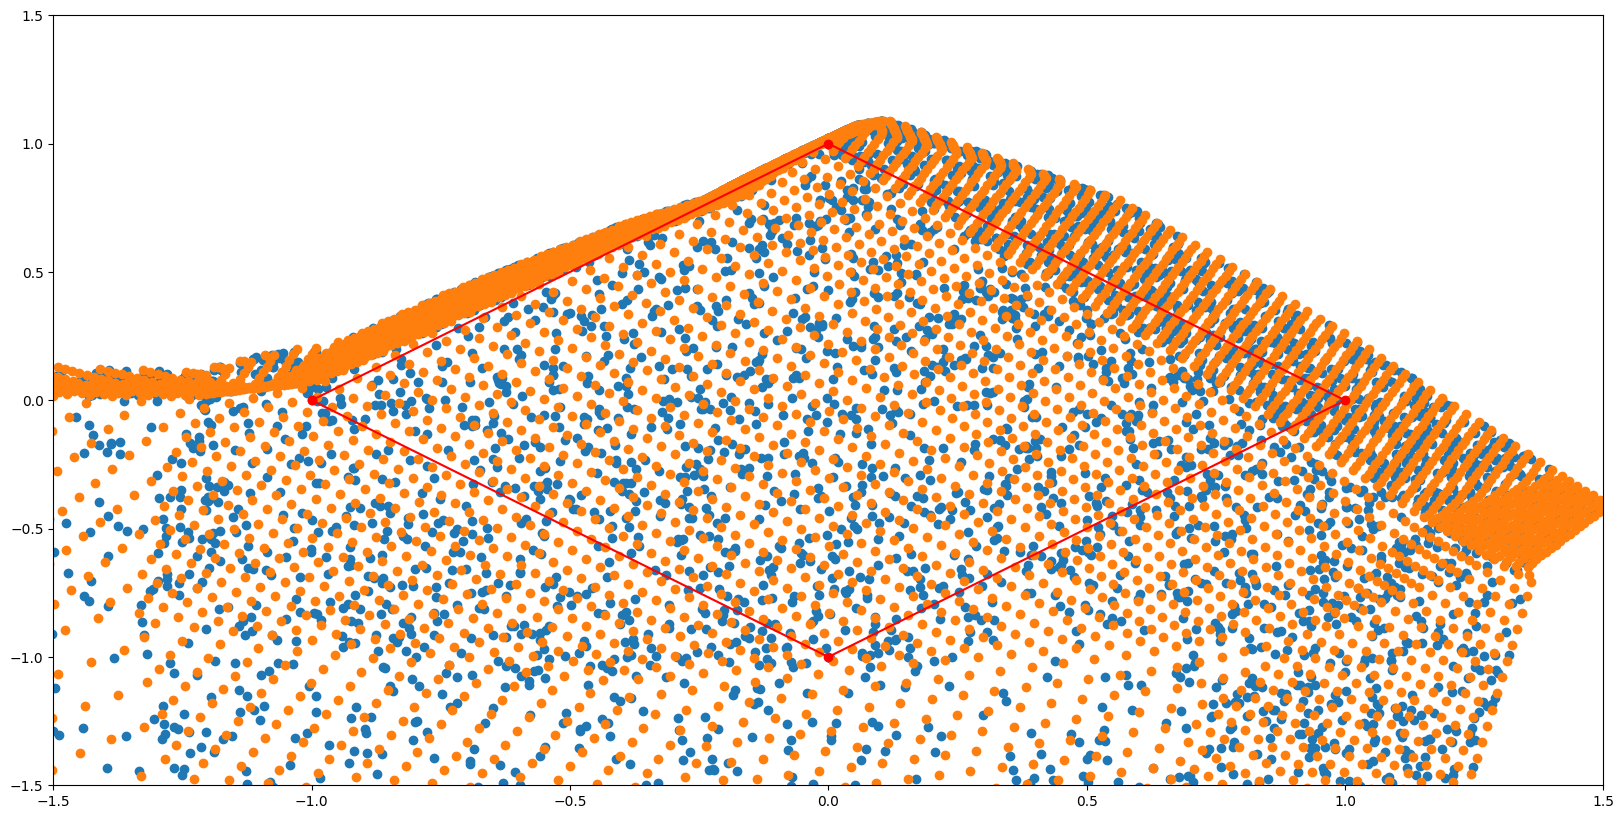

In [5]:
for i in range(int(epochs / 10)):
    history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=10, train_ICNN=False, hyper_lambda=hyper_lambda, use_max_distance=True)
    print("run {}".format(i))
    plots.plt_adversarial_dotted()